# Assignment 3: SVM
<font color = 'red'>Complete the TODO sections below...</font><br>
<b> Name: Hyun Chung <br>
<b> Email: hchung11@uncc.edu

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import normalize
import itertools

# Dataset description

In [51]:
#https://www.kaggle.com/mlg-ulb/creditcardfraud
dataset = pd.read_csv('creditcard.csv')

In [52]:
print ("Data shape : ",dataset.shape)
dataset.head()

Data shape :  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
#0 mean regular tranaction
#1 mean fraud tranaction 
dataset['Class'].unique()

array([0, 1], dtype=int64)

In [55]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [56]:
print(dataset.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


In [57]:
No_frands = len (dataset[dataset["Class"]== 1])
No_Nonfrand = len (dataset[dataset["Class"]== 0])
total = No_frands + No_Nonfrand
frand_percent = No_frands/ total
Nonfrand_percent = No_Nonfrand / total
print ("Class 0 % : ", Nonfrand_percent)
print ("Class 1 % : ", frand_percent)

Class 0 % :  0.9982725143693799
Class 1 % :  0.001727485630620034


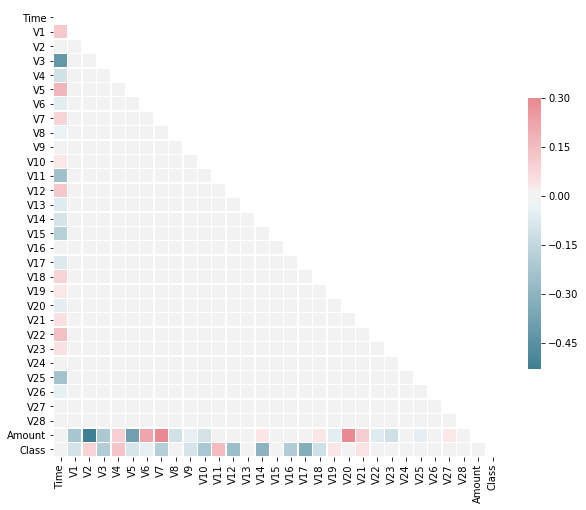

In [58]:
import seaborn as sns
plt.figure(figsize =(10, 10))
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.heatmap(corr, xticklabels=corr.columns.values ,yticklabels=corr.columns.values)

In [59]:
def plot_confusion_matrix(cm, classes, title = 'Confusion matrix', 
                     cmap = plt.cm.Reds):
    plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

# Preprocessing

### Most imporant part.
#### In this preprocessing, only use half of "Class" column data. About each both side 200.  Random 200 data sample.

In [60]:
#store only "Class" is 1"
fraud_i = np.array(dataset[dataset["Class"] == 1].index)
print (fraud_i.size)
#half the the Class 1.
numb_half_fraud = int(fraud_i.size/2)
#
Nonfraud_i = np.array(dataset[dataset["Class"]== 0].index)
print (Nonfraud_i.size)

#Pick random half the data from Class 1.
pick_random_nonfraud_index = np.random.choice(Nonfraud_i, numb_half_fraud, replace = False)
#pick just 246 random data from Class 0.
pick_random_fraud_index = np.random.choice(fraud_i, numb_half_fraud, replace = False)

#data that i choose were index so i need to change to "array"
pick_random_nonfraud_index = np.array(pick_random_nonfraud_index)
pick_random_fraud_index = np.array(pick_random_fraud_index)


print ("random pick(nonfraud) : ",pick_random_nonfraud_index.size)
print ("random pick(fraud) : ",pick_random_fraud_index.size)

#put Class 1 and Class 0 data into same one data.
minsampled_indices= np.concatenate([pick_random_fraud_index, pick_random_nonfraud_index])
print (minsampled_indices.size)

492
284315
random pick(nonfraud) :  246
random pick(fraud) :  246
492


<h3>Drop the unnessary data.</h3>

In [61]:
minisampled_data= dataset.iloc[minsampled_indices, :]
print (minisampled_data.shape)
#pick only all the Class
labels = minisampled_data['Class']
#Time, Class, and Amount are not nessary for train.
train_1 = minisampled_data.drop(['Class','Time',"Amount"], axis = 1)

(492, 31)


In [62]:
labels.shape

(492,)

In [63]:
#easier to see X, y
X = train_1
y = labels

In [64]:
print(X.shape,y.shape)

(492, 28) (492,)


In [65]:
#This is test data
data_target = dataset['Class']
data_cc= dataset.drop(['Class',"Time","Amount"], axis = 1)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_cc, data_target, test_size = 0.25, random_state = 1)
#print(y_test.groupby('Class').size())
print(len(y_test[y_test[:]== 0]))
print(len(y_test[y_test[:]== 1]))

71091
111


In [67]:
#caulate accuracy
def accarcy (CM):
    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")

In [68]:
def recall (CM):
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")

<h1> Implementatation </h1>
<h2> Linear </h2>

In [69]:
#training rbf. Set to c=100 because recall valuse was higher
# i tried .1,1,7,10,100
clf = svm.SVC(C=7,kernel='linear',gamma = 'auto')
#Training the data 429
clf.fit(X,y)

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
#predict x_test.
pred=clf.predict(x_test)
cm = confusion_matrix(y_test,pred)

In [71]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=40, facecolors='red')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

[-10, 10, -10, 10]

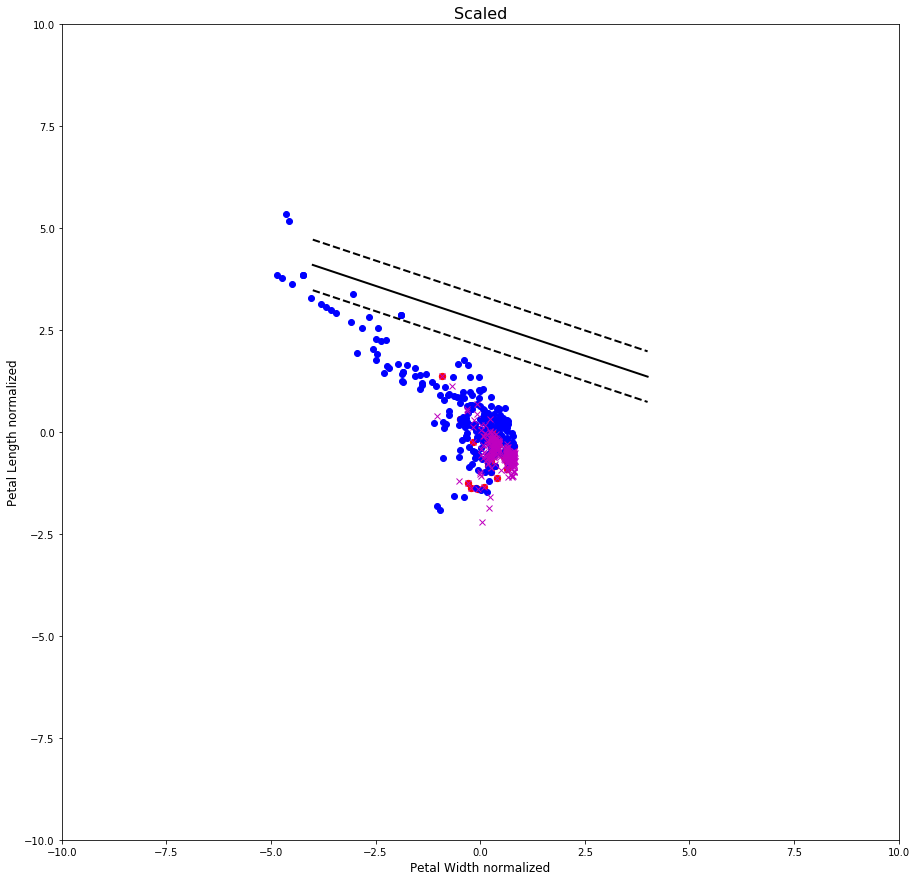

In [72]:
import numpy as np

plt.figure(figsize=(15,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
clf.fit(X_scaled, y)

plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "mx")
plot_svc_decision_boundary(clf, -4,4)
plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-10, 10, -10, 10])

## Polynomial 

In [73]:
#useing the Polynomial 
clf_poly = svm.SVC(C=7,kernel='poly',degree=2,gamma = 'auto')
#fit same data.
clf_poly.fit(X,y)

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
#training rbf. Set to c=7 because recall valuse was higher
# i tried .1,1,7,10,100
pred_poly =clf_poly.predict(x_test)
cm_poly = confusion_matrix(y_test,pred_poly)

## RBF

In [75]:
#make sure training data is correct
print(X.shape,y.shape)

(492, 28) (492,)


In [76]:
#training rbf. Set to c=100 because recall valuse was higher
# i tried .1,1,10,100
clf_rbf = svm.SVC(C=7,kernel='rbf',degree=2, gamma = 'auto')
clf_rbf.fit(X,y)

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
pred_rbf =clf_rbf.predict(x_test)
cm_rbf = confusion_matrix(y_test,pred_rbf)

# Results 

## Linear

In [78]:
scores= precision_recall_fscore_support(y_test,pred)
print(scores)
accarcy(cm)
recall(cm)

(array([0.99988234, 0.03206725]), array([0.95626732, 0.92792793]), array([0.9775886 , 0.06199218]), array([71091,   111], dtype=int64))
The accuracy is 95.62231397994438 %
The recall from the confusion matrix is 92.7927927927928 %


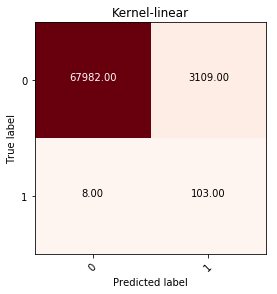

In [79]:
plot_confusion_matrix(cm,['0','1'], title = "Kernel-linear")

## Polynomial confusion matrices plots

In [80]:
scores_poly = precision_recall_fscore_support(y_test,pred_poly)
print(scores_poly)
accarcy(cm_poly)
recall(cm_poly)

(array([0.99994056, 0.02741481]), array([0.94660365, 0.96396396]), array([0.97254137, 0.0533134 ]), array([71091,   111], dtype=int64))
The accuracy is 94.6630712620432 %
The recall from the confusion matrix is 96.3963963963964 %


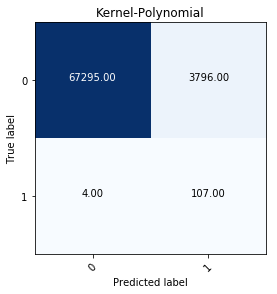

In [81]:
plot_confusion_matrix(cm_poly,['0','1'], title = "Kernel-Polynomial", cmap= plt.cm.Blues)

## RBF confusion matrices plots

In [82]:
scores_rbf = precision_recall_fscore_support(y_test,pred_rbf)
print (scores_rbf)
accarcy(cm_rbf)
recall(cm_rbf)

(array([0.99995408, 0.01841118]), array([0.91900522, 0.97297297]), array([0.95777229, 0.03613853]), array([71091,   111], dtype=int64))
The accuracy is 91.90893514227129 %
The recall from the confusion matrix is 97.2972972972973 %


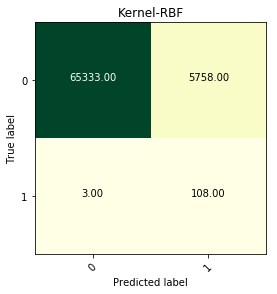

In [83]:
plot_confusion_matrix(cm_rbf,['0','1'], title = "Kernel-RBF", cmap= plt.cm.YlGn)

<h1>Conclusion </h1>

<p>The most important thing wasn't modeling the data. From this assignment, i learned that How to training the data is the most important part of this assignment. For example in this data that fraud trasction are so small, compare to the regular transaction. I choose to make the same size of both fraud and regular. I believe, that this way the linear, polynomial, or RBF can detect the fraud transaction. In this result, I can detect the fraud transaction 96.38%.</p>